In [1]:
from keras.layers import Input,Dense, Conv2D, MaxPooling2D,UpSampling2D
from keras.models import Sequential, Model
# from keras.callbacks import TensorBoard, ModelCheckpoint
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import cv2
import os
from os import listdir

/home/jugs/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def image_to_feature_vector(img, size=(96,96)):         # Avg Dim 1798,1260
    return cv2.resize(img, size).flatten()

In [3]:
path = '/home/jugs/PycharmProjects/compression/face/'

In [4]:
onlyfiles = [f for f in listdir(path)]

In [5]:
data = []
for f in onlyfiles:
    fp = os.path.join(path, f)
    x = cv2.imread(fp)
    x = image_to_feature_vector(x)
    x = x.astype('float32') / 255
    x = np.reshape(x, (96, 96, 3))
    data.append(x)
print(len(data))

6937


In [7]:
x_train = np.reshape(data[:5000], (5000, 96, 96, 3))
x_test = np.reshape(data[5001:], (1936, 96, 96, 3))

In [30]:
input_image = Input(shape=(96, 96, 3))

x = Conv2D(12, (3, 3), activation='relu', padding='same')(input_image)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)

encoded = MaxPooling2D((2, 2), padding='same')(x)

# x = UpSampling2D((2, 2))(encoded)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(encoded)
# x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(24, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(12, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['acc'])
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 96, 96, 3)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 96, 96, 12)        336       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 48, 48, 12)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 48, 48, 24)        2616      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 24, 24, 24)        0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 24, 24, 48)        10416     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 12, 12, 48)        0         
__________

In [17]:
encoder = Model(input_image, encoded)
encoded_input = Input(shape=(4,4,3))

decoder_layer = autoencoder.layers[-6]
decoder = Model(encoded_input, decoder_layer(encoded_input) )  

In [25]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128,
                    shuffle=True, validation_data=(x_test, x_test))

Train on 5000 samples, validate on 1936 samples
Epoch 1/100
5000/5000 [==============================] - 55s - loss: 0.6714 - acc: 0.0050 - val_loss: 0.6366 - val_acc: 0.0068
Epoch 2/100
5000/5000 [==============================] - 58s - loss: 0.5889 - acc: 0.0069 - val_loss: 0.5578 - val_acc: 0.0072
Epoch 3/100
5000/5000 [==============================] - 71s - loss: 0.5537 - acc: 0.0071 - val_loss: 0.5506 - val_acc: 0.0072
Epoch 4/100
5000/5000 [==============================] - 70s - loss: 0.5498 - acc: 0.0071 - val_loss: 0.5546 - val_acc: 0.0072
Epoch 5/100
5000/5000 [==============================] - 70s - loss: 0.5471 - acc: 0.0072 - val_loss: 0.5508 - val_acc: 0.0072
Epoch 6/100
5000/5000 [==============================] - 63s - loss: 0.5455 - acc: 0.0072 - val_loss: 0.5494 - val_acc: 0.0073
Epoch 7/100
5000/5000 [==============================] - 57s - loss: 0.5437 - acc: 0.0072 - val_loss: 0.5500 - val_acc: 0.0073
Epoch 8/100
5000/5000 [==============================] - 71s - 

5000/5000 [==============================] - 56s - loss: 0.5264 - acc: 0.0072 - val_loss: 0.5298 - val_acc: 0.0073
Epoch 65/100
5000/5000 [==============================] - 56s - loss: 0.5263 - acc: 0.0072 - val_loss: 0.5282 - val_acc: 0.0073
Epoch 66/100
5000/5000 [==============================] - 56s - loss: 0.5262 - acc: 0.0072 - val_loss: 0.5282 - val_acc: 0.0073
Epoch 67/100
5000/5000 [==============================] - 56s - loss: 0.5261 - acc: 0.0072 - val_loss: 0.5292 - val_acc: 0.0073
Epoch 68/100
5000/5000 [==============================] - 56s - loss: 0.5262 - acc: 0.0072 - val_loss: 0.5280 - val_acc: 0.0073
Epoch 69/100
5000/5000 [==============================] - 57s - loss: 0.5260 - acc: 0.0072 - val_loss: 0.5287 - val_acc: 0.0073
Epoch 70/100
5000/5000 [==============================] - 56s - loss: 0.5262 - acc: 0.0072 - val_loss: 0.5289 - val_acc: 0.0073
Epoch 71/100
5000/5000 [==============================] - 56s - loss: 0.5261 - acc: 0.0072 - val_loss: 0.5282 - val_a

In [26]:
encoded_img = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

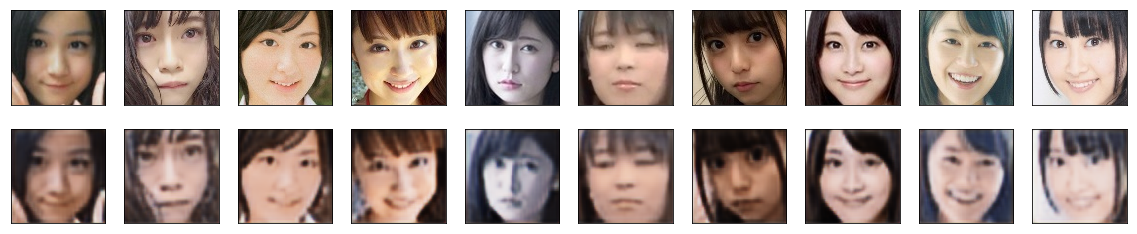

In [27]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    pic = cv2.cvtColor(x_test[i].reshape( 96,96,3), cv2.COLOR_BGR2RGB)
    plt.imshow(pic)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display encoded
#     ax = plt.subplot(2, n, i + 1 + n)
#     plt.imshow(encoded_img[i].reshape(3,3,128))
#     plt.gray()
#     ax.get_xaxis().set_visible(False)
#     ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    pic =cv2.cvtColor(decoded_imgs[i].reshape( 96,96,3), cv2.COLOR_BGR2RGB)
    plt.imshow(pic)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()